**Attribute information**

Input variables:

bank client data:

1 - age (numeric)

2 - job : type of job (categorical: “admin.”,“unknown”,“unemployed”,“management”,“housemaid”,“entrepreneur”, “student”,“blue-collar”,“self-employed”,“retired”,“technician”,“services”)

3 - marital : marital status (categorical: “married”,“divorced”,“single”; note: “divorced” means divorced or widowed)

4 - education (categorical: “unknown”,“secondary”,“primary”,“tertiary”)

5 - default: has credit in default? (binary: “yes”,“no”)

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: “yes”,“no”)

8 - loan: has personal loan? (binary: “yes”,“no”)

related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: “unknown”,“telephone”,“cellular”)

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)

12 - duration: last contact duration, in seconds (numeric)

other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: “unknown”,“other”,“failure”,“success”)

output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: “yes”,“no”)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

**1. Importing the Dataset**

In [2]:
#upload the Train Dataset
banking_train= pd.read_csv("train.csv",sep =";")
banking_train.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#upload the Test Dataset
banking_test= pd.read_csv("test.csv",sep =";")
banking_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


**2. Understanding the Datasets**

In [4]:
print(banking_test.shape)
print(banking_train.shape)

(4521, 17)
(45211, 17)


In [5]:
banking_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


The datatypes for job, marital, education, default, housing, loan, contact, month, and poutcome are object which are regarded as categorical variables.

While, datatype for age, balance, day, duration, campaign, pdays, and previous is int64, which are numerical variables.

**2.1 Missing Values**

In [6]:
#Checking if there are any missing values
banking_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
stringdata = banking_train.select_dtypes(include="object")
for column in stringdata:
    print(stringdata[column].value_counts())
    print ("-" * 20)

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
--------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
--------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
--------------------
no     44396
yes      815
Name: default, dtype: int64
--------------------
yes    25130
no     20081
Name: housing, dtype: int64
--------------------
no     37967
yes     7244
Name: loan, dtype: int64
--------------------
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
--------------------
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar

**2.2 Duplicate Values**

In [8]:
#checking for duplicate values
print(banking_train.duplicated().value_counts())
print(banking_test.duplicated().value_counts())

False    45211
dtype: int64
False    4521
dtype: int64


**Data Summary**

**Overview**

The dataset has 45211 entries and 17 columns.

Number of variables: 17

Numeric variables: 7

Categorical variables: 10

Number of observations: 45211

Missing cells : 0

The dataset does not have any duplicate values.

**2.3 Correlation Coefficient**

We can also use heat maps to visualize the correlation between the numerical values. It is quite evident from the graph that pdays and previous are highly correlated (0.45).

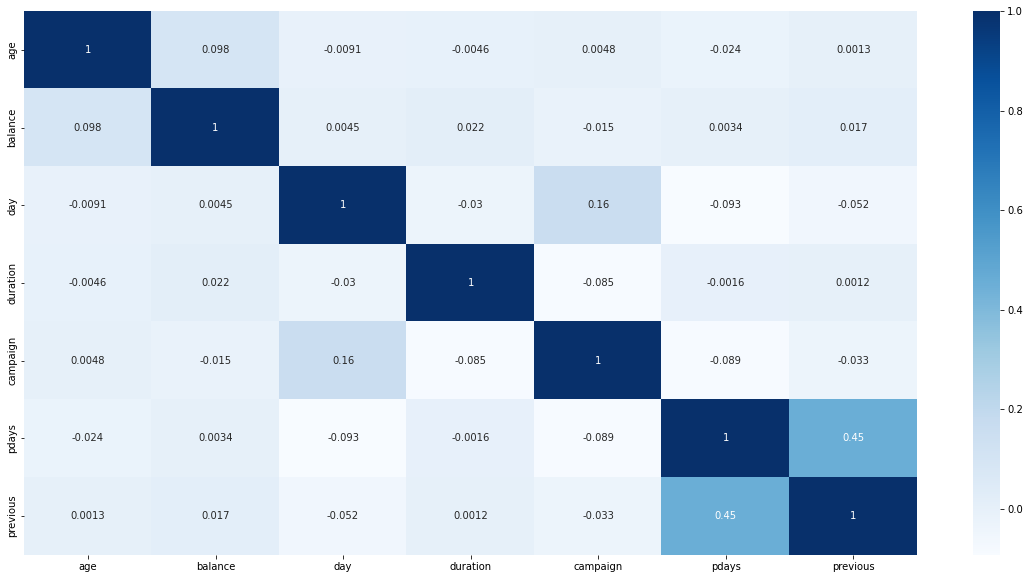

In [9]:
#correleaion for the dataset
plt.figure(figsize=(20,10))
sns.heatmap(banking_train.corr(),annot = True,cmap='Blues')

**3. Exploratory Data Analysis and Visualization**

**3.1. Exploring Numerical Columns**

In [10]:
# desciptive analysis for numerical columns
banking_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


The data in the table are descriptive of each numerical column, providing information about the data. The table shows that there are no missing columns because each column has the same number of counts, of 45211. Additionally, the "previous" column shows that the min, 25%, 50%, and 75% rows all have 0 values but the max row has a value of 275. this means that in the  "previous" column is the value 0  shows that there was no communication before the campaign therefore it will not be treated as the missing values.

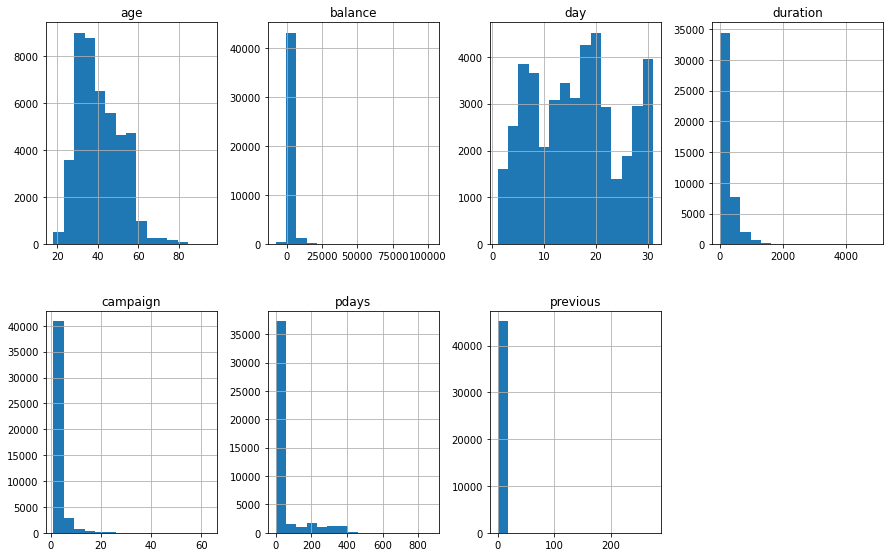

In [11]:
#visualize the data distribution of numerical data

banking_train[['age','balance','day','duration','campaign','pdays','previous']].hist(bins=15, figsize=(15, 20), layout=(4, 4));


**From the graphs above:-** 

Age: The most of customers are in the 20 to 40 age range.

Balance: Customers' yearly balances range from 0 to 10,000 on average.

Campaign: Between 1 and 20 customer contacts were made on average throughout the campaign.

Day: Customers often made contact on the last day of the month between the hours of 10 and 20.

Duration: Customers' latest contacts lasted, on average, between 0 and 2000 seconds.

Pday: The majority of the time, 0 to 100 days have passed since the customers from the last campaign were last contacted.

Previous: Before the campaign, each client made an average of between 0 and 10 contacts.


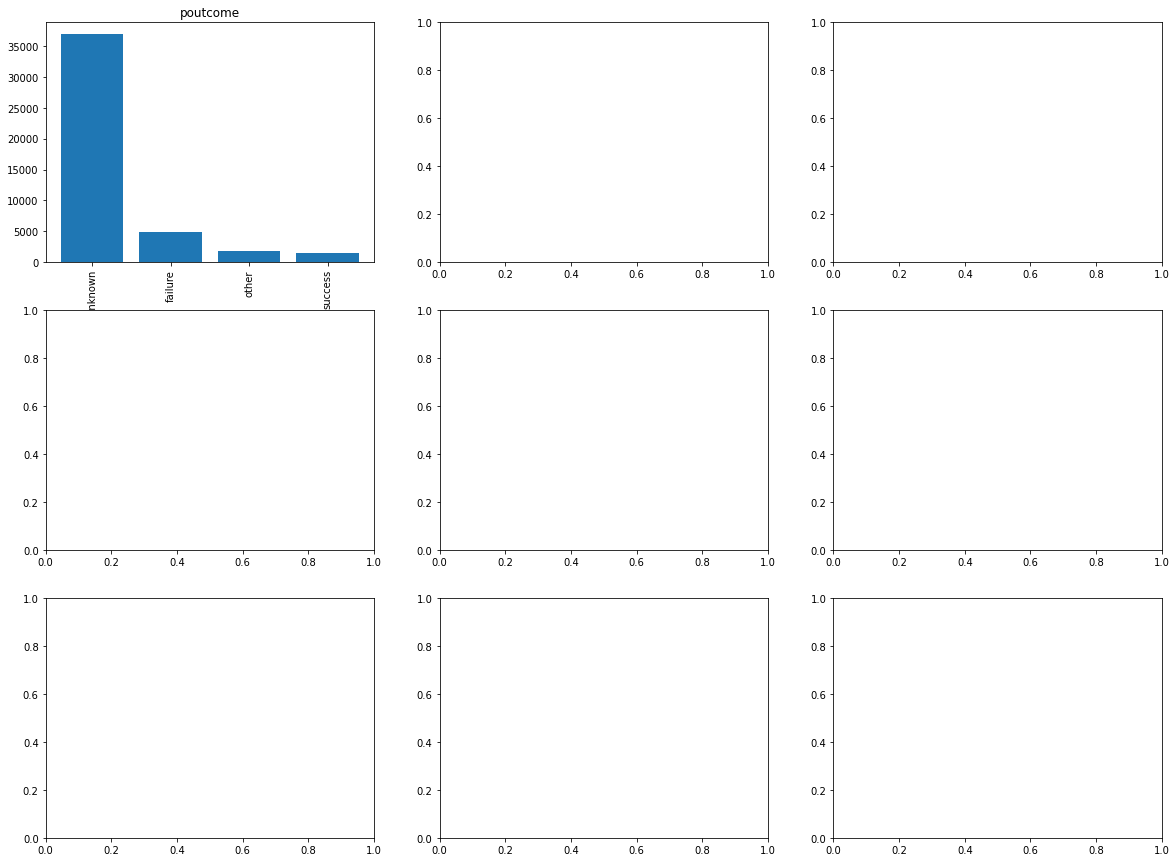

In [12]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
  value_counts = banking_train[cat_column].value_counts()
    
trace_x = counter // 3
trace_y = counter % 3
x_pos = np.arange(0, len(value_counts))
    
axs[trace_x, trace_y].bar(x_pos, value_counts.values,tick_label = value_counts.index)
axs[trace_x, trace_y].set_title(cat_column)
    
for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
          
counter += 1

plt.show()

**3.1.1. Age Variable**

<Figure size 7200x1296 with 0 Axes>

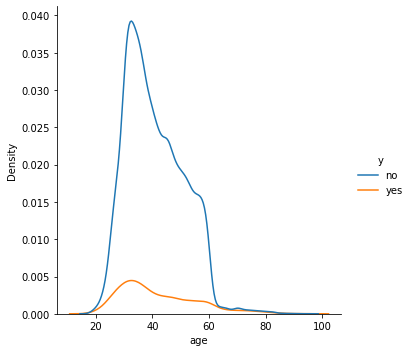

In [13]:
plt.figure(figsize=(100, 18))
sns.displot(data=banking_train, x='age', hue='y', kind="kde")

The graph reveals that the highest age range for both "yes" and "no" subscription responses is between 30 years old. The graph also shows that the "no" on subscriptions declines after age 60 and remains constant from the age 70.

Overall, the "yes" subscription distribution is lower than the "no" subscription distribution.

**3.1.2. Balance Variable**

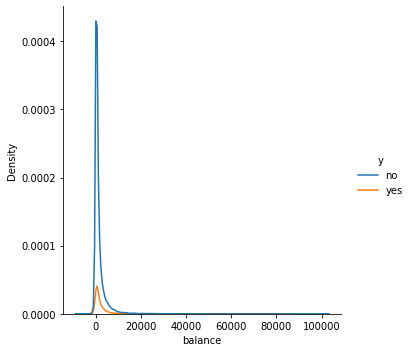

In [14]:
sns.displot(data=banking_train, x='balance', hue='y', kind="kde")

The graph shows that the average balance  for both subscribed customers and not subscribe customers are in between of 0 to 10000

**3.1.3. Campaign Variable**

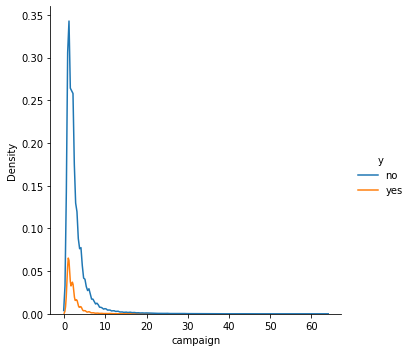

In [15]:
sns.displot(data=banking_train, x='campaign', hue='y', kind="kde")

According to the graph, the average number of contacts performed by during the campaign are mostly in between of 0 to 10.

**3.1.4. Day Variable**

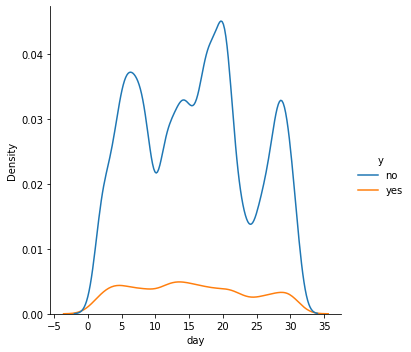

In [16]:
sns.displot(data=banking_train, x='day', hue='y', kind="kde")

The graph indicates that the highest is 18th for both subscriptions. while on 28th the "no" on subscriptions starts decreasing.

Generally, the "yes" subscription distribution is lower than the "no" subscription distribution.

**3.1.5. Duration Variable**

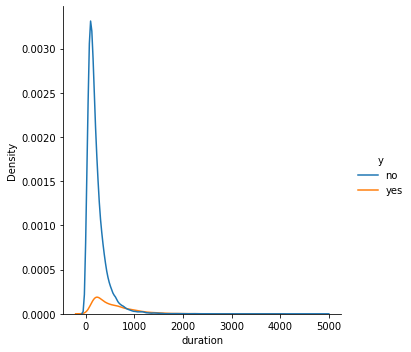

In [17]:
sns.displot(data=banking_train, x='duration', hue='y', kind="kde")

According to graph below, the last contact duration of not subscribe customers are mostly between 0 to 1000 seconds while for subscribed customers, the last contact duration is between 0 to 2000 seconds.

**3.2. Exploring Categorical Columns**



**3.2.1. Education Variable**

In [18]:
edu_train = banking_train['education'].value_counts().sort_values(ascending=False)
edu_train

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

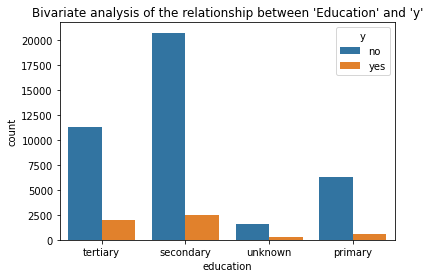

In [19]:
sns.countplot(x="education",data=banking_train, hue = "y")
edu_train = banking_train['education'].value_counts().sort_values(ascending=False)
plt.title("Bivariate analysis of the relationship between 'Education' and 'y'")
edu_train

The graph shows that, most customers who are have secondary education have subscribed to term deposit followed by those in tertiary, primary and unknown.

**3.2.2. Marital Variable**

In [20]:
marital_train = banking_train['marital'].value_counts().sort_values(ascending=False)
marital_train

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Text(0.5, 1.0, "Bivariate analysis of the relationship between 'Marital' and 'y'")

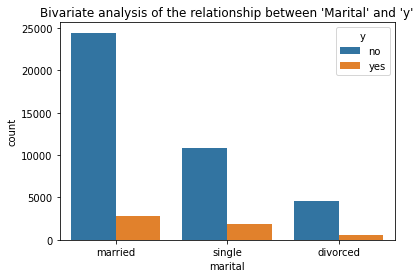

In [21]:
sns.countplot(x="marital",data=banking_train, hue = "y")
plt.title("Bivariate analysis of the relationship between 'Marital' and 'y'")

According to the graph, most of the customers who are married will not subscribe the term deposit. 

Also, higher number of customers who are married have subscribed the term depost compared to single customers and divorced customers.

**3.2.3. Job Variable**

In [22]:
job_train= banking_train['job'].value_counts().sort_values(ascending=False)
job_train

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

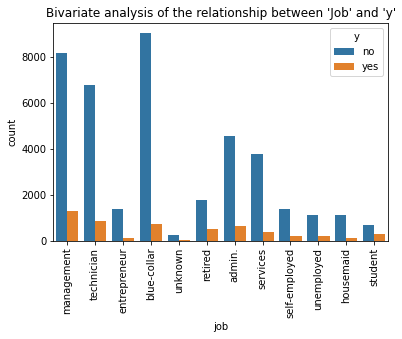

In [23]:
sns.countplot(x="job", data = banking_train,hue = "y")
plt.title("Bivariate analysis of the relationship between 'Job' and 'y'")
plt.xticks(rotation=90)
job_train= banking_train['job'].value_counts().sort_values(ascending=False)
job_train

The graph shows that, the highest number of customers who do not subscribe the term deposit are from 'blue-collar' job then followed by management job. While the highest number of job for subscribed customers fall in management then technician.

**3.2.4. Loan Variable**

In [24]:
loan_train= banking_train['loan'].value_counts().sort_values(ascending=False)
loan_train

no     37967
yes     7244
Name: loan, dtype: int64

Text(0.5, 1.0, "Bivariate analysis of the relationship between 'Loan' and 'y'")

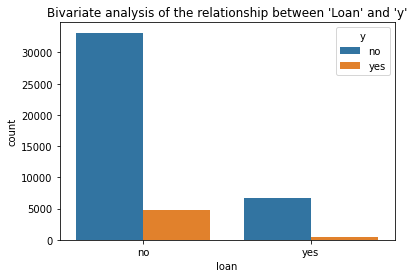

In [25]:
sns.countplot(x="loan", data = banking_train, hue = "y")
plt.title("Bivariate analysis of the relationship between 'Loan' and 'y'")

According to the graph, based on the customer that have subscribed the term deposit, most of the customers don't have loan. 

**3.2.5. Contact Variable**

In [26]:
contact_train= banking_train['contact'].value_counts().sort_values(ascending=False)
contact_train

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Text(0.5, 1.0, "Bivariate analysis of the relationship between 'Contact' and 'y'")

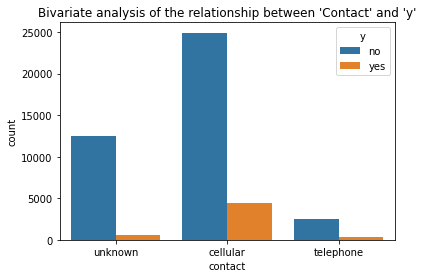

In [27]:
sns.countplot(x="contact", data = banking_train, hue = "y")
plt.title("Bivariate analysis of the relationship between 'Contact' and 'y'")

From the graph, number of customers in both who didn't and who subcribed the term deposit in cellular are many compaired to telephone and unknown.

**3.2.6. Default Variable**

In [28]:
default_train= banking_train['default'].value_counts().sort_values(ascending=False)
default_train

no     44396
yes      815
Name: default, dtype: int64

Text(0.5, 1.0, "Bivariate analysis of the relationship between 'Default' and 'y'")

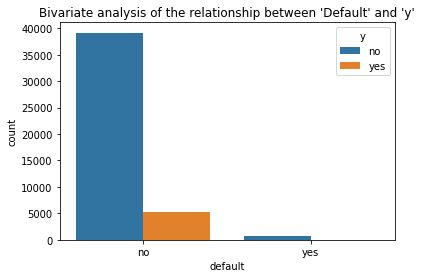

In [29]:
sns.countplot(x="default", data = banking_train,hue = "y")
plt.title("Bivariate analysis of the relationship between 'Default' and 'y'")

According to the graph, most of the customers do not have credit in default and are not subscribing the term deposit while few of them have subscribed the term deposit.

**3.2.7 Month Variable**

In [30]:
month_train= banking_train['month'].value_counts().sort_values(ascending=False)
month_train

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

Text(0.5, 1.0, "Bivariate analysis of the relationship between 'Month' and 'y'")

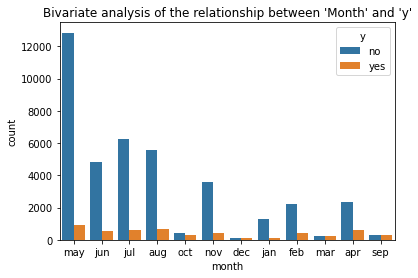

In [31]:
sns.countplot(x="month", data = banking_train,hue = "y")
plt.title("Bivariate analysis of the relationship between 'Month' and 'y'")

The graph above shows that the month of May has the both most subscribers, followed by the month of August.

**3.2.8. Housing Variable**

In [32]:
housing_train= banking_train['housing'].value_counts().sort_values(ascending=False)
housing_train

yes    25130
no     20081
Name: housing, dtype: int64

Text(0.5, 1.0, "Bivariate analysis of the relationship between 'Housing' and 'y'")

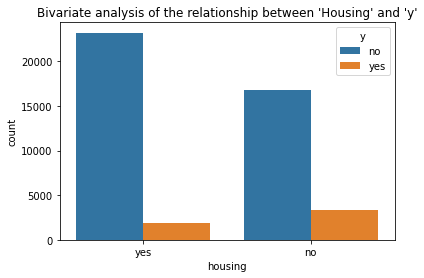

In [33]:
sns.countplot(x="housing", data = banking_train, hue = "y")
plt.title("Bivariate analysis of the relationship between 'Housing' and 'y'")

According to the graph, many customers that do not have housing loan are the customers willing to subscribe the term deposit which are higher than customers that have housing loan.

**3.2.9. Poutcome Variable**

In [34]:
poutcome_train= banking_train['poutcome'].value_counts().sort_values(ascending=False)
poutcome_train

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

Text(0.5, 1.0, "Bivariate analysis of the relationship between 'Poutcome' and 'y'")

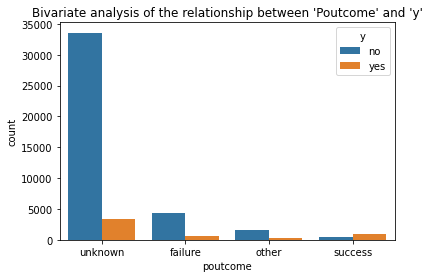

In [35]:
sns.countplot(x="poutcome", data = banking_train, hue = "y")
plt.title("Bivariate analysis of the relationship between 'Poutcome' and 'y'")

The graph above shows that of the most customers who subscribed for a term deposit falls into the "unknown" group, as well as customer who didn't subscribed fall on the "unknown" group which has the greatest percentage.

**3.2.10. Y (Target Variable)**

In [36]:
y_train= banking_train['y'].value_counts().sort_values(ascending=False)
y_train

no     39922
yes     5289
Name: y, dtype: int64

Text(0.5, 1.0, 'Univariate analysis of the target')

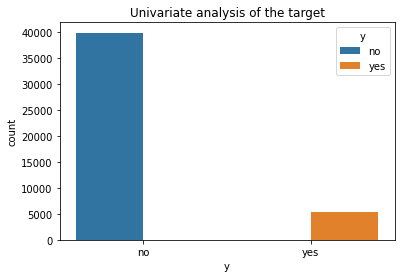

In [37]:
sns.countplot(x="y", data = banking_train, hue = "y")
plt.title("Univariate analysis of the target")


**3.3. Checking for Outliers using Boxplot**

age            AxesSubplot(0.125,0.657941;0.133621x0.222059)
balance     AxesSubplot(0.285345,0.657941;0.133621x0.222059)
day          AxesSubplot(0.44569,0.657941;0.133621x0.222059)
duration    AxesSubplot(0.606034,0.657941;0.133621x0.222059)
campaign    AxesSubplot(0.766379,0.657941;0.133621x0.222059)
pdays          AxesSubplot(0.125,0.391471;0.133621x0.222059)
previous    AxesSubplot(0.285345,0.391471;0.133621x0.222059)
dtype: object

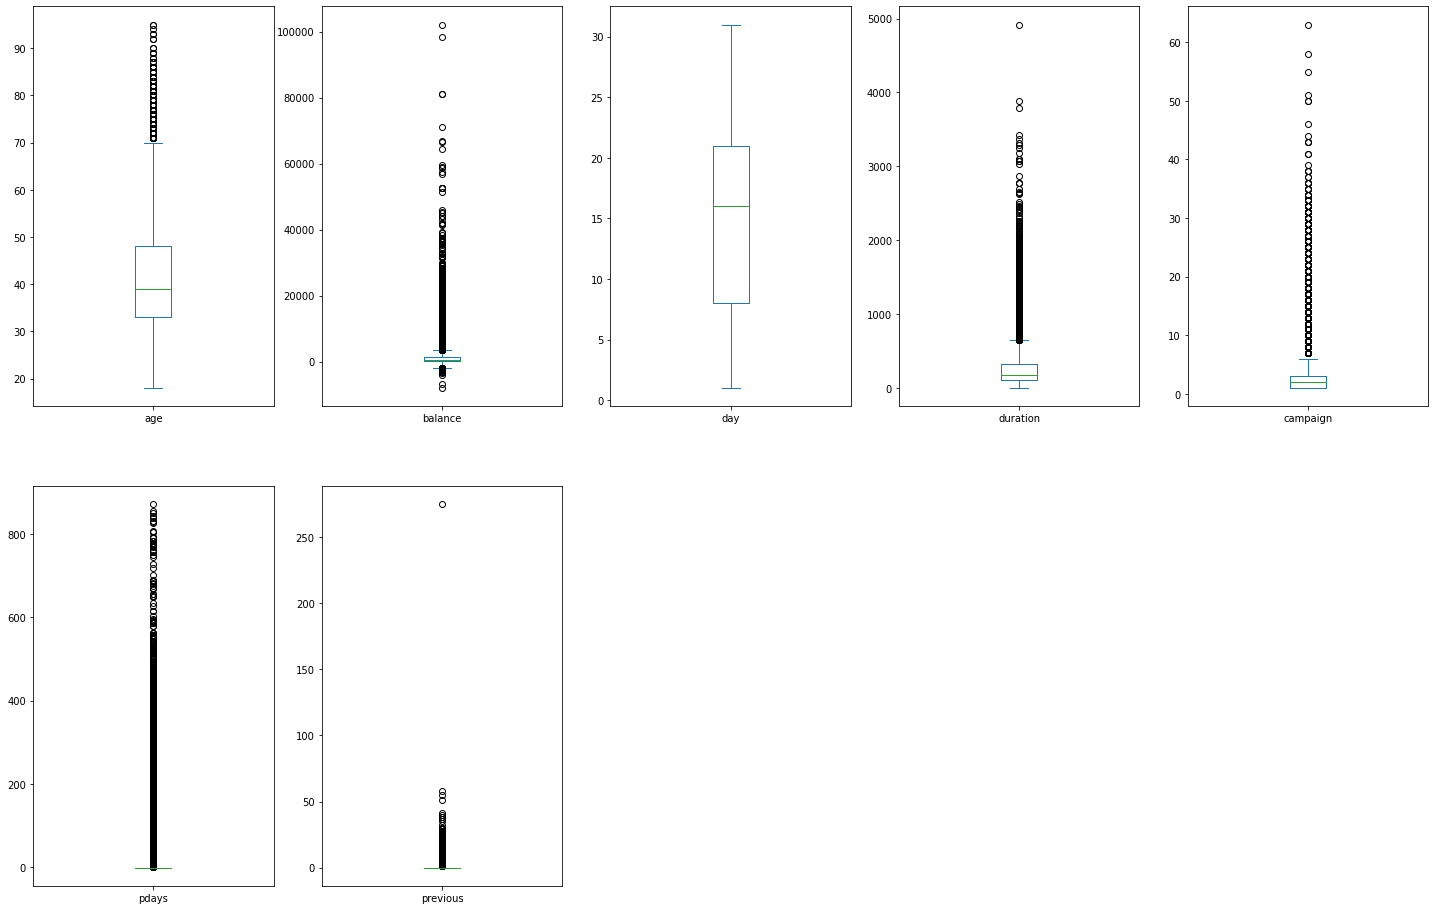

In [38]:
banking_train.plot(kind="box", subplots=True, layout=(3,5), figsize=(25,25))

From the plots above we can see very clear that the variables balance, campaign and duration contain outliers.

**Data Pre-Processing**

Before we can begin to create our first model we first need to pre-process our data. This step ensure that our model will receive a good data. The data pre-processing will be divided into few steps as explained below. For this step we will concatenate the train and test datasets together so we can easily clean the dataset.



In [39]:
# Concatenate train and test dataset to perform pre-prepocessing
banking_concat = pd.concat([banking_train, banking_test], ignore_index=True)
banking_concat.shape

(49732, 17)

**Class Distribution**

Before entering our data into the model, it's crucial to check the data's class distribution. In our situation, where there are two possible outcomes, "yes" and "no".

As we can see our class distribution is imbalance which may affect our models, so we will have to balance the dataset before modelling

In [40]:
banking_concat['y'].value_counts()

no     43922
yes     5810
Name: y, dtype: int64

**Scale Numeric Data**

Next, we will scale our numerical data to avoid any outliers that might have a big impact on our model. We may scale each of our columns that include numerical data using the StandardScaler() method from Sklearn.

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
banking_concat[num_cols] = scaler.fit_transform(banking_concat[num_cols])

banking_concat.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.605529,management,married,tertiary,no,0.254880,yes,no,unknown,-1.300726,may,261,-0.57003,-0.411068,-0.255849,unknown,no
1,0.286628,technician,single,secondary,no,-0.440154,yes,no,unknown,-1.300726,may,151,-0.57003,-0.411068,-0.255849,unknown,no
2,-0.749651,entrepreneur,married,secondary,no,-0.449031,yes,yes,unknown,-1.300726,may,76,-0.57003,-0.411068,-0.255849,unknown,no
3,0.569250,blue-collar,married,unknown,no,0.045450,yes,no,unknown,-1.300726,may,92,-0.57003,-0.411068,-0.255849,unknown,no
4,-0.749651,unknown,single,unknown,no,-0.449359,no,no,unknown,-1.300726,may,198,-0.57003,-0.411068,-0.255849,unknown,no


**4.2. Encode Categorical Value**

Same as the numerical data, we also need to pre-process our categorical data from words to number to make it easier for the computer to understands. 

In [42]:
#Encoding categorical features.
banking_concat['default'] = banking_concat['default'].map({'yes': 1, 'no': 0})
banking_concat['housing'] = banking_concat['housing'].map({'yes': 1, 'no': 0})
banking_concat['loan'] = banking_concat['loan'].map({'yes': 1, 'no': 0})
banking_concat['contact'] = banking_concat['contact'].map({'telephone': 1, 'cellular': 0, 'unknown':2})
banking_concat['y'] = banking_concat['y'].map({'yes': 1, 'no': 0})
banking_concat

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.605529,management,married,tertiary,0,0.254880,1,0,2,-1.300726,may,261,-0.570030,-0.411068,-0.255849,unknown,0
1,0.286628,technician,single,secondary,0,-0.440154,1,0,2,-1.300726,may,151,-0.570030,-0.411068,-0.255849,unknown,0
2,-0.749651,entrepreneur,married,secondary,0,-0.449031,1,1,2,-1.300726,may,76,-0.570030,-0.411068,-0.255849,unknown,0
3,0.569250,blue-collar,married,unknown,0,0.045450,1,0,2,-1.300726,may,92,-0.570030,-0.411068,-0.255849,unknown,0
4,-0.749651,unknown,single,unknown,0,-0.449359,0,0,2,-1.300726,may,198,-0.570030,-0.411068,-0.255849,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,-0.749651,services,married,secondary,0,-0.559171,1,0,0,1.705673,jul,329,0.720691,-0.411068,-0.255849,unknown,0
49728,1.511321,self-employed,married,tertiary,1,-1.538925,1,1,2,-0.819703,may,153,-0.570030,-0.411068,-0.255849,unknown,0
49729,1.511321,technician,married,secondary,0,-0.352699,0,0,0,0.382857,aug,151,2.656772,-0.411068,-0.255849,unknown,0
49730,-1.220687,blue-collar,married,secondary,0,-0.075869,0,0,0,-1.180470,feb,129,0.398010,1.706262,1.074637,other,0


In [43]:
#Variables job, marital and education are categorical variable that are converted into dummy variables.
banking_concat = pd.get_dummies(banking_concat, columns=['job', 'marital', 'education', 'poutcome','month'])
banking_concat

,age,default,balance,housing,loan,contact,day,duration,campaign,pdays,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1.605529,0,0.254880,1,0,2,-1.300726,261,-0.570030,-0.411068,...,0,0,0,0,0,0,1,0,0,0
1,0.286628,0,-0.440154,1,0,2,-1.300726,151,-0.570030,-0.411068,...,0,0,0,0,0,0,1,0,0,0
2,-0.749651,0,-0.449031,1,1,2,-1.300726,76,-0.570030,-0.411068,...,0,0,0,0,0,0,1,0,0,0
3,0.569250,0,0.045450,1,0,2,-1.300726,92,-0.570030,-0.411068,...,0,0,0,0,0,0,1,0,0,0
4,-0.749651,0,-0.449359,0,0,2,-1.300726,198,-0.570030,-0.411068,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,-0.749651,0,-0.559171,1,0,0,1.705673,329,0.720691,-0.411068,...,0,0,0,1,0,0,0,0,0,0
49728,1.511321,1,-1.538925,1,1,2,-0.819703,153,-0.570030,-0.411068,...,0,0,0,0,0,0,1,0,0,0
49729,1.511321,0,-0.352699,0,0,0,0.382857,151,2.656772,-0.411068,...,0,0,0,0,0,0,0,0,0,0
49730,-1.220687,0,-0.075869,0,0,0,-1.180470,129,0.398010,1.706262,...,0,1,0,0,0,0,0,0,0,0


**4.1. Correlation with Target Variable**

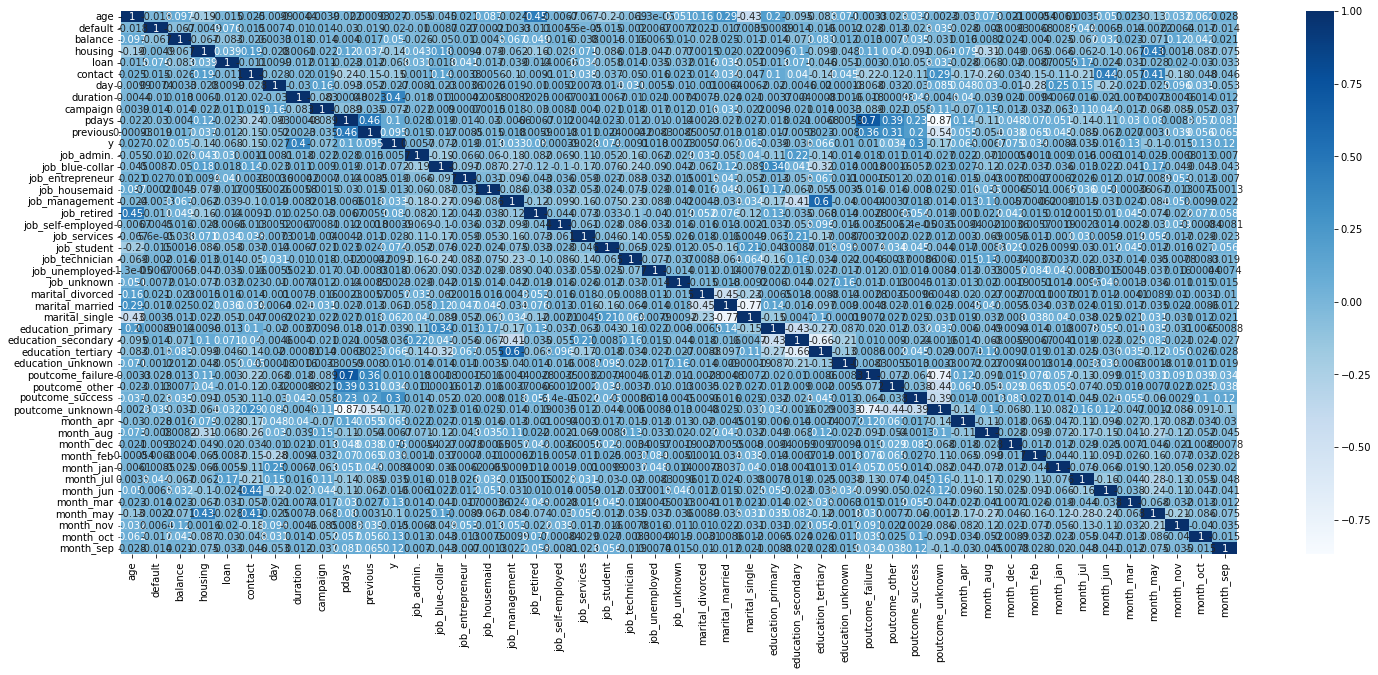

In [44]:
#correlation matrix with target variable
plt.figure(figsize=(25,10))
sns.heatmap(banking_concat.corr(), annot=True,cmap='Blues')
plt.show()


From the above correlation matrix the most correlated variable with target feature is call duration (0.4). There are no input variable that has perfect correlation with the target variable.

**4.1.1 Splitting the data into Train and Test Dataset**

To finish up our data pre-processing steps we will split our data into two dataset, training and testing. In this case we will split the data with ratio of 75:25 for training and testing respectively.

In [45]:
from sklearn.model_selection import train_test_split

X = banking_concat.drop(columns='y')
y = banking_concat['y']

train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.25, random_state=1)

**SMOTE for oversampling minority class**

When we have a class imbalance in the dataset, the models tends to be more biased towards the majority class, causing bad classification of the minority class.As We can see from above Class distribution that our dataset data class imbalance we need to handle it. So i have used SMOTE for the training data set only.

In [46]:
#Checkig for imbalances in the classes
y = np.bincount(train_y)
i = np.nonzero(y)[0]
np.vstack((i,y[i])).T

array([[    0, 32913],
       [    1,  4386]])

In [47]:
#Applying SMOTE on the trainingg data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 12)
X_train_smote, y_train_smote = sm.fit_resample(train_X,train_y)

In [48]:
#Checking for imbalances in the training data
y = np.bincount(y_train_smote)
i = np.nonzero(y)[0]
np.vstack((i,y[i])).T



array([[    0, 32913],
       [    1, 32913]])

**5.0. Modelling**

We can proceed with developing our model once we have confirmed that our data is accurate and prepared. We will attempt to construct 4 distinct models using various algorithms in this notebook. In this stage, we'll use the default Sklearn parameters to generate a baseline model for each method, and then we'll compare the results to evaluate which algorithm performs best in our situation.

The confusion matrix will serve as the base for our evaluation of our model.

In [49]:
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection 

**5.1 Logistic Regression**

In [50]:
from sklearn.decomposition import PCA


pca = PCA(n_components=30)
pca.fit(X)
X_PCA = pca.transform(X)
#X_pca_test = pca.transform(X_test)
X_PCA = pd.DataFrame(data = X_PCA)
pca.explained_variance_ratio_[:30].sum()

0.9999969092946165

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Building Logistic Regression
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train_smote, y_train_smote)

# Evaluate Model
y_pred_lr = model.predict(test_X)
result = confusion_matrix(test_y, y_pred_lr)

# Print result
print("Confusion Matrix:")
print(result)
result1 = classification_report(test_y, y_pred_lr)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(test_y,y_pred_lr)
print("Accuracy:",result2)

Confusion Matrix:
[[10611   398]
 [  816   608]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11009
           1       0.60      0.43      0.50      1424

    accuracy                           0.90     12433
   macro avg       0.77      0.70      0.72     12433
weighted avg       0.89      0.90      0.89     12433

Accuracy: 0.9023566315450816


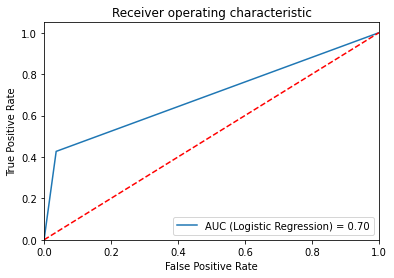

In [52]:
test_y_int = test_y.replace({'Good': 1, 'Bad': 0})
auc_lr = metrics.roc_auc_score(test_y_int, y_pred_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(test_y_int, y_pred_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**5.2. KNeighbors Classifier**

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay

# Building KNeighbors Classifier
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(X_train_smote, y_train_smote)

# Evaluate Model
y_pred_kn = classifier.predict(test_X)
result = confusion_matrix(test_y, y_pred_kn)

# Print result
print("Confusion Matrix:")
print(result)
result1 = classification_report(test_y, y_pred_kn)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(test_y,y_pred_kn)
print("Accuracy:",result2)


Confusion Matrix:
[[9874 1135]
 [ 552  872]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92     11009
           1       0.43      0.61      0.51      1424

    accuracy                           0.86     12433
   macro avg       0.69      0.75      0.71     12433
weighted avg       0.89      0.86      0.87     12433

Accuracy: 0.8643127161586102


**5.3. Decision Tree**

In [54]:
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train_smote, y_train_smote)

# Evaluate Model
y_pred_dt = dtc.predict(test_X)
cm = confusion_matrix(test_y, y_pred_dt)

# Print result
print("Confusion Matrix:")
print(cm)
result1 = classification_report(test_y, y_pred_dt)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(test_y,y_pred_dt)
print("Accuracy:",result2)

Confusion Matrix:
[[10264   745]
 [  600   824]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     11009
           1       0.53      0.58      0.55      1424

    accuracy                           0.89     12433
   macro avg       0.73      0.76      0.74     12433
weighted avg       0.90      0.89      0.89     12433

Accuracy: 0.8918201560363549


**5.4. Random Forest**

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rand_forest = RandomForestClassifier(n_estimators= 100, random_state=0)
rand_forest.fit(X_train_smote, y_train_smote)

# Evaluate Model
y_pred_rf = rand_forest.predict(test_X)
result = confusion_matrix(test_y, y_pred_rf)

# Print result
print("Confusion Matrix:")
print(result)
result1 = classification_report(test_y, y_pred_rf)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(test_y,y_pred_rf)
print("Accuracy:",result2)

Confusion Matrix:
[[10619   390]
 [  638   786]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11009
           1       0.67      0.55      0.60      1424

    accuracy                           0.92     12433
   macro avg       0.81      0.76      0.78     12433
weighted avg       0.91      0.92      0.91     12433

Accuracy: 0.9173168181452586


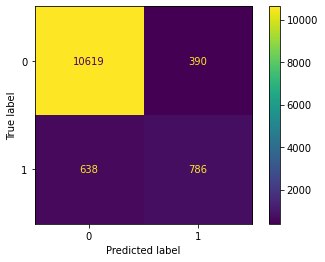

In [56]:
# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=result, display_labels=rand_forest.classes_)
disp.plot()

**6.0. Model Comparison**

After building all of our models, we can now compare how well each model perform. To do this we will create a line chart to show the AUC of all our models.

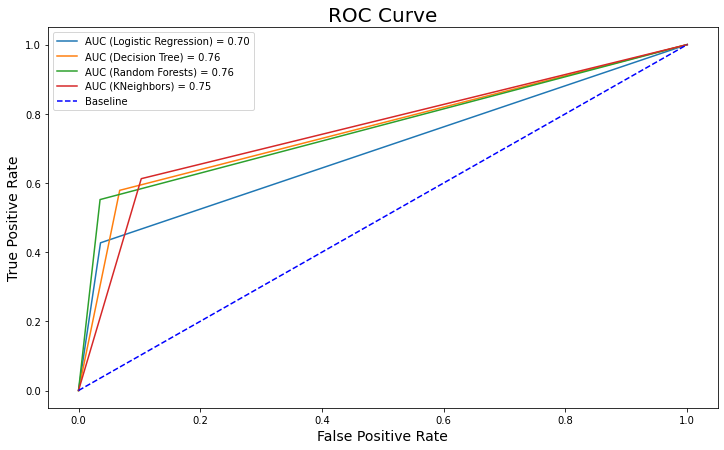

In [57]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve

test_y_int = test_y.replace({'Good': 1, 'Bad': 0})
auc_lr = metrics.roc_auc_score(test_y_int, y_pred_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(test_y_int, y_pred_lr)

auc_kn = metrics.roc_auc_score(test_y_int, y_pred_kn)
fpr_kn, tpr_kn, thresholds_kn = roc_curve(test_y_int, y_pred_kn)

auc_dt = metrics.roc_auc_score(test_y_int, y_pred_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(test_y_int, y_pred_dt)

auc_rf = metrics.roc_auc_score(test_y_int, y_pred_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_y_int, y_pred_rf)


plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_kn, tpr_kn, label=f'AUC (KNeighbors) = {auc_kn:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

From the figure above we can see that our Random Forest model and Decision Tree have the same AUC of 0.76 but since Random Forest model has high accuracy, recall and f1 score compared to Decision Tree model. Therefore we assume that Random Forest is the best choice to solve our classification problem.

**Random Forest Feature Importance**

In [58]:
importances = rand_forest.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Print the feature ranking
print("Feature ranking:")
for f in range(train_X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 7 (0.248590)
2. feature 3 (0.067931)
3. feature 2 (0.050372)
4. feature 5 (0.046905)
5. feature 8 (0.045202)
6. feature 6 (0.043208)
7. feature 0 (0.038060)
8. feature 42 (0.034074)
9. feature 35 (0.028605)
10. feature 9 (0.028082)
11. feature 10 (0.027160)
12. feature 39 (0.025833)
13. feature 4 (0.023792)
14. feature 30 (0.022812)
15. feature 12 (0.021964)
16. feature 24 (0.021289)
17. feature 43 (0.020720)
18. feature 33 (0.015548)
19. feature 27 (0.014721)
20. feature 26 (0.012749)
21. feature 20 (0.012671)
22. feature 25 (0.012216)
23. feature 40 (0.012055)
24. feature 28 (0.011709)
25. feature 37 (0.010766)
26. feature 23 (0.010310)
27. feature 15 (0.009995)
28. feature 38 (0.009493)
29. feature 31 (0.009388)
30. feature 18 (0.009034)
31. feature 34 (0.008813)
32. feature 11 (0.007379)
33. feature 32 (0.005387)
34. feature 29 (0.004871)
35. feature 17 (0.003427)
36. feature 44 (0.003378)
37. feature 21 (0.003326)
38. feature 13 (0.003238)
39. feature 1

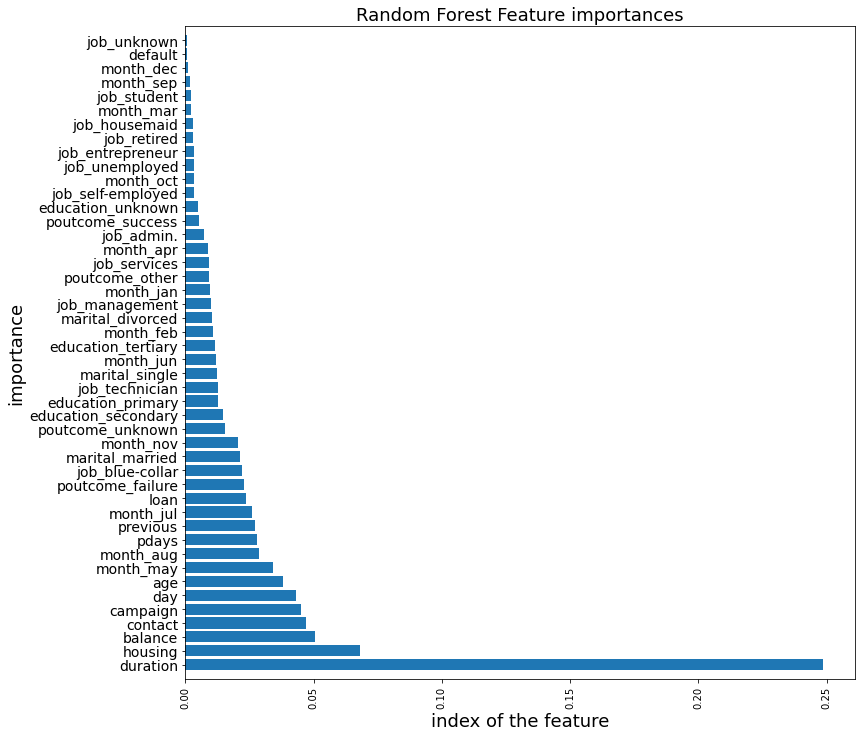

In [59]:
# Plot the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,12))
    plt.title("Random Forest Feature importances", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    plt.xticks(rotation=90)
    plt.ylabel("importance", fontsize = 18)
    plt.xlabel("index of the feature", fontsize = 18)
   
      
feature_importance_graph(indices, importances, feature_names)
plt.show()